In [17]:
import glob, os, cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [112]:
modelName = "256_64_16_6_0.0001_20"
fitted = glob.glob("fitted/{0}/*.jpg".format(modelName))
fittedCsv = pd.read_csv("fitted.csv")
truthCsv = pd.read_csv("train.csv")
flattenList = lambda l: [item for sublist in l for item in sublist]

In [99]:
croppedFolder = "cropped/{0}/".format(modelName)
if not os.path.exists(croppedFolder):
    os.mkdir(croppedFolder)

In [131]:
pd.DataFrame(df)

0                 1                 2                 3  \
0  w1_1426.jpg  [0.384845463609]  [0.388833499501]  [0.422731804586]   
1  w1_5267.jpg  [0.400797607178]  [0.512462612164]  [0.485211033566]   
2   w1_558.jpg  [0.471252907943]   [0.48554336989]  [0.532402791625]   
3  w1_6890.jpg  [0.549684280492]  [0.582253240279]  [0.495181123297]   
4  w1_9418.jpg  [0.453971419076]  [0.674975074776]  [0.475240943835]   
5  w1_6204.jpg  [0.456630109671]  [0.139581256231]  [0.433366566966]   
6   w1_146.jpg  [0.613492854769]  [0.569292123629]  [0.500498504487]   
7    w1_21.jpg  [0.444666001994]  [0.554336989033]  [0.357593885012]   
8  w1_6367.jpg   [0.43137254902]  [0.563310069791]  [0.340977068794]   
9  w1_3299.jpg  [0.412761714855]  [0.457627118644]  [0.482552342971]   

                  4  5  6  
0  [0.504486540379]  0  0  
1  [0.452642073779]  0  0  
2  [0.367896311067]  0  0  
3  [0.578265204387]  0  0  
4  [0.599202392822]  0  0  
5  [0.244267198405]  0  0  
6  [0.544366899302]  0  0  
7  [0.513459621137]  0  0  
8  [0.599202392822]  0  0  
9  [0.535393818544]  0  0

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


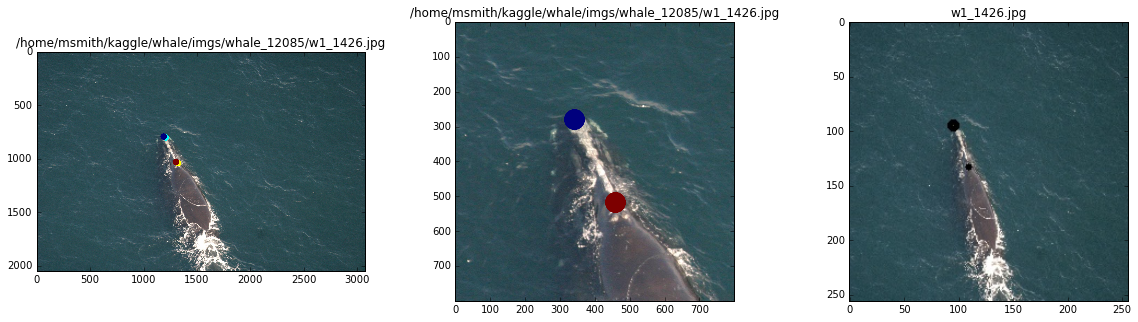

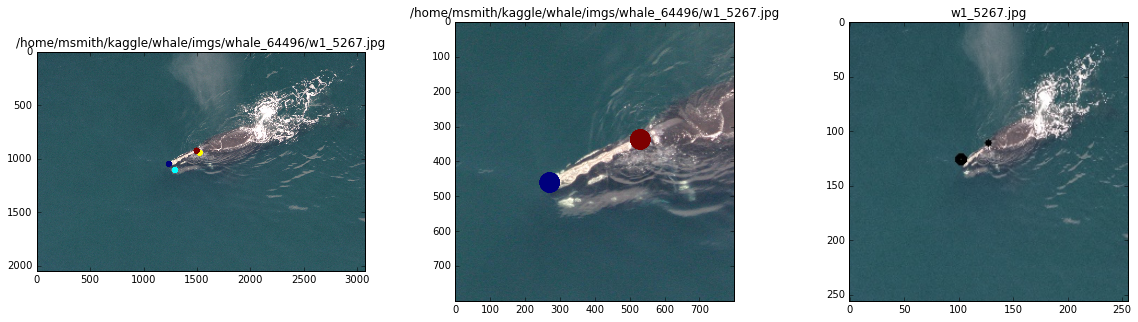

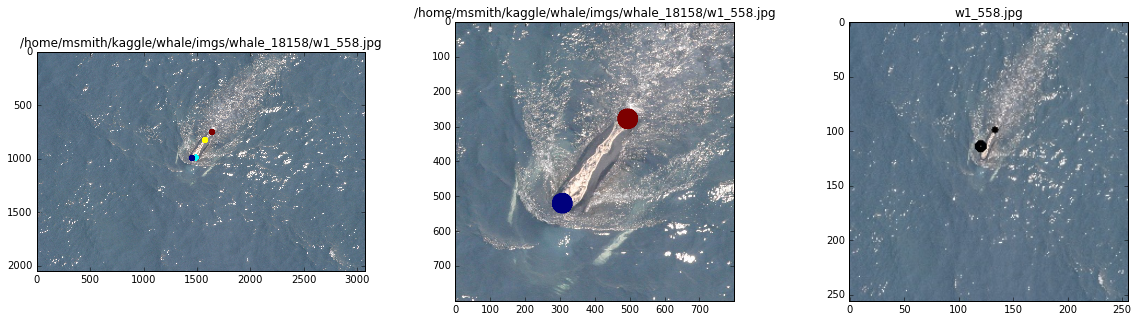

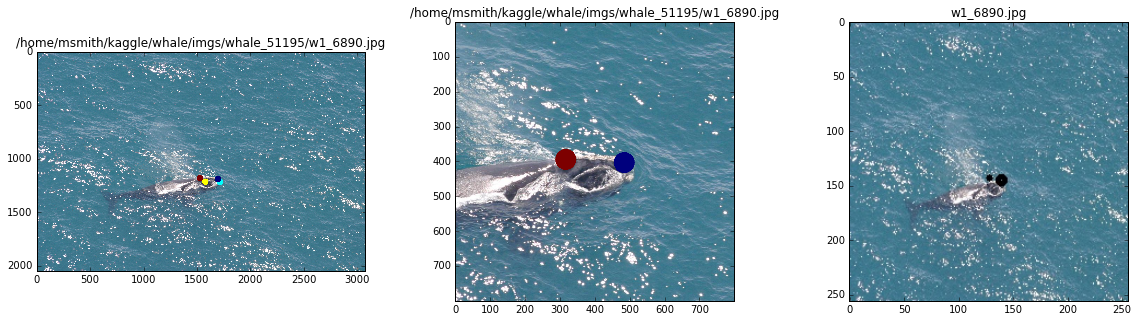

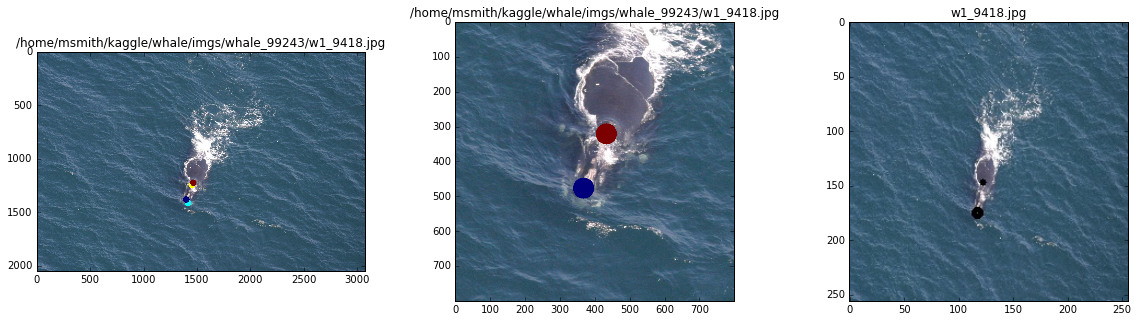

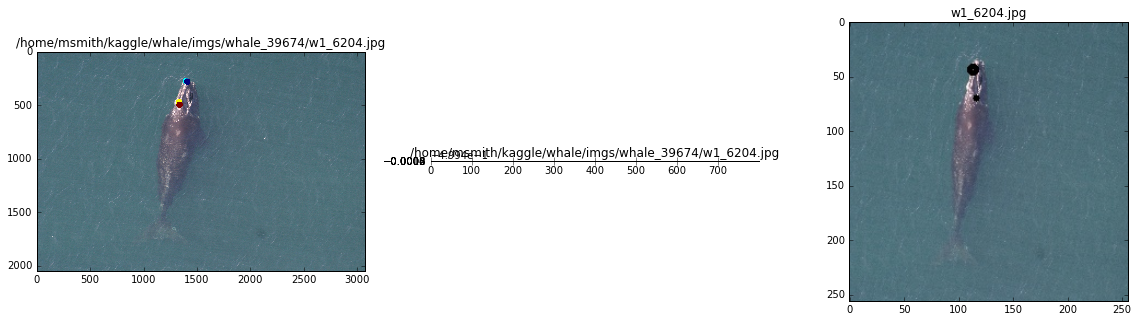

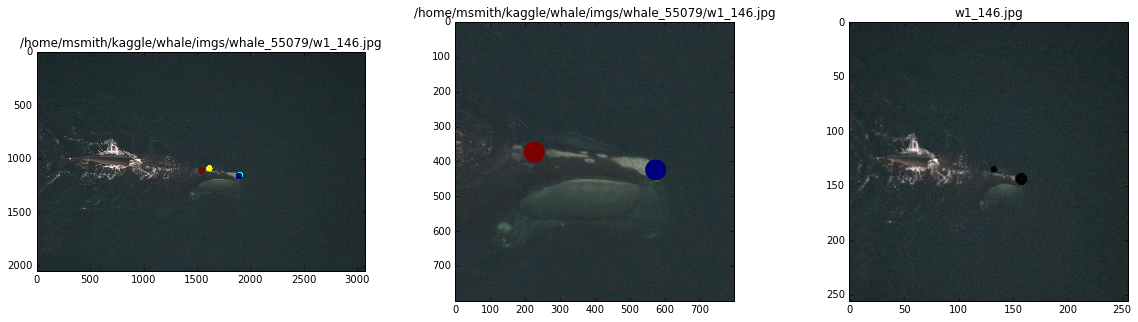

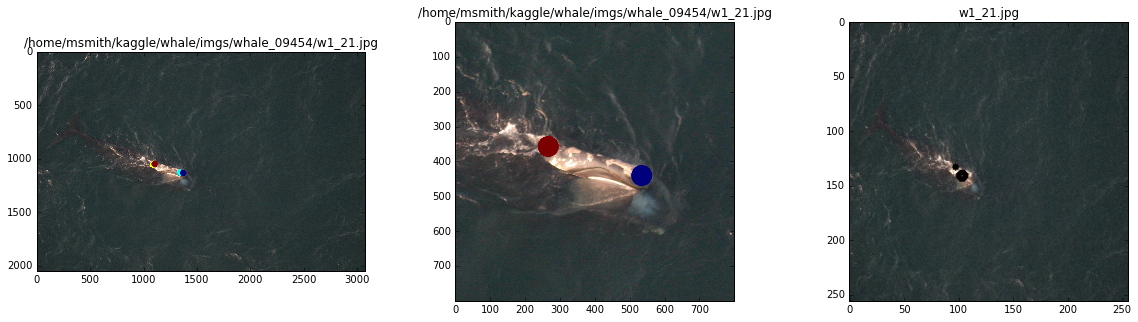

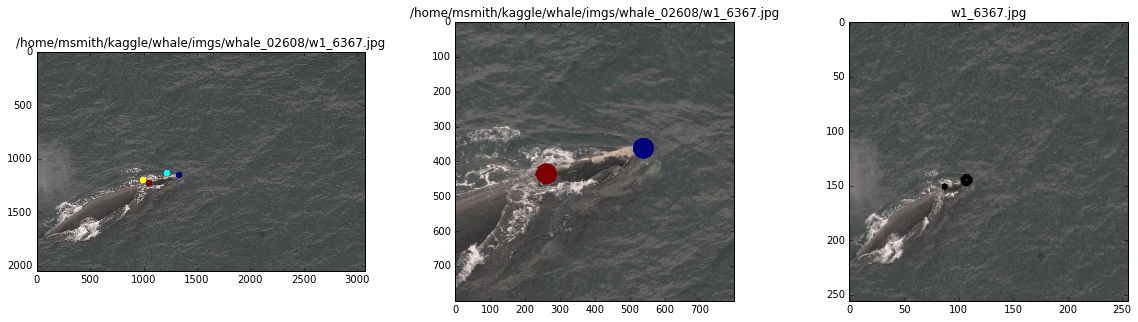

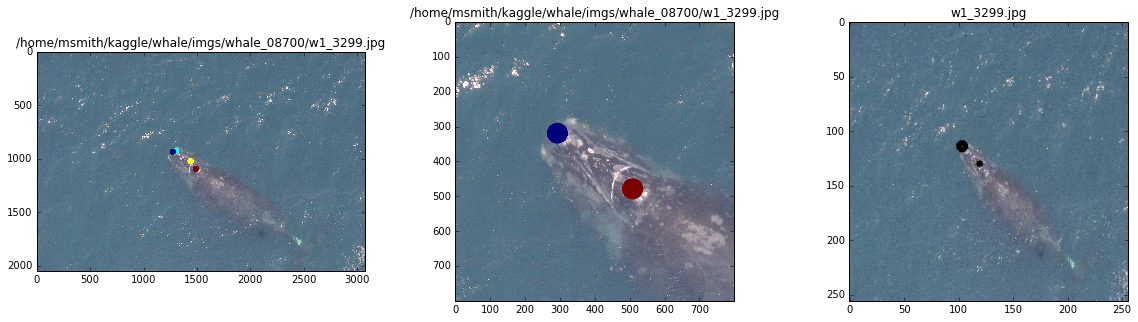

In [136]:
df = []
for f in fitted[:10]:
    img = cv2.imread(f)
    name = f.split("/")[-1]
    origPath = glob.glob("../imgs/*/{0}".format(name))[0]
    origPath = os.path.abspath(origPath)
    imgO = cv2.imread(origPath)
    h,w,c = imgO.shape  
    def rowToCoords(csv,path,imgShape,rescale=0):
        h,w,c = imgShape  
        csvRow = csv[csv["path"] == path]
        x1 = csvRow.x1
        y1 = csvRow.y1
        x2 = csvRow.x2
        y2 = csvRow.y2
        xM = (x2 + x1)/2.0
        yM = (y2 + y1)/2.0
        if rescale == 1:
            x1*=w
            x2*=w
            y1*=h
            y2*=h
            xM*=w
            yM*=h

        return [i.values for i in x1, y1, x2, y2, xM, yM]

    x1, y1, x2, y2, xM, yM = rowToCoords(fittedCsv,origPath,imgO.shape,rescale=1)

    x1TR, y1TR, x2TR, y2TR, xMTR, yMTR = rowToCoords(truthCsv,origPath,imgO.shape,rescale=1)
    pad = 400
    imgC = imgO[yMTR-pad:yMTR+pad,xMTR-pad:xMTR+pad].copy()
    xCorner, yCorner = xMTR-pad, yMTR-pad # top left corner of cropped area
    
    
    x1New, y1New = x1TR - xCorner, y1TR - yCorner
    x2New, y2New = x2TR - xCorner, y2TR - yCorner
    cv2.imwrite(croppedFolder + name,imgC)
    
    # New (normalized) coords
    x1T, y1T, x2T, y2T, xMT, yMT = rowToCoords(truthCsv,origPath,imgO.shape)
    h,w,c = imgC.shape
    df.append([name,x1T, y1T, x2T, y2T,w,h])
    
    def show():

        cv2.circle(imgO,(x1,y1),30,(255,255,0),-1)
        cv2.circle(imgO,(x2,y2),30,(0,255,255),-1)
        cv2.circle(imgO,(x1TR,y1TR),30,(125,0,0),-1)
        cv2.circle(imgO,(x2TR,y2TR),30,(0,0,125),-1)

        cv2.circle(imgC,(x1New,y1New),30,(125,0,0),-1)
        cv2.circle(imgC,(x2New,y2New),30,(0,0,125),-1)

        plt.figure(figsize=(20,5))
        plt.subplot(131)
        plt.imshow(imgO[:,:,::-1]); plt.title(origPath);
        plt.subplot(132)
        plt.imshow(imgC[:,:,::-1]); plt.title(origPath);
        plt.subplot(133)
        plt.imshow(img[:,:,::-1]);plt.title(name);
        plt.show()
    show()